In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
from numpy import cos, sin
%matplotlib inline

from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

In [19]:
def SignalModel_EM2(theta, t):
    omega0, epsI, a0, chi, epsA = theta
    psidot = -epsI*omega0
    psi = psidot*t + np.pi/2.

    GEOMETRIC = (psidot**2*(2*(sin(chi)*cos(a0) - sin(a0)*sin(psi)*cos(chi))
                      *(sin(chi)*sin(a0)*sin(psi) + cos(chi)*cos(a0))*sin(chi)
                      - ((sin(chi)*sin(psi)*cos(a0) - sin(a0)*cos(chi))**2
                      + sin(chi)**2*cos(psi)**2)*cos(chi))*sin(chi)*sin(a0)
                      *cos(psi)/((sin(chi)*sin(psi)*cos(a0)
                    - sin(a0)*cos(chi))**2 
                      + sin(chi)**2*cos(psi)**2)**2
                        ) / (2*np.pi) 
    

    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = omega0*(1 - epsI * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
                        (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2))

    # Standard values for c , R in cgs
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA 
    PHIDDOT = -k * Phidot**3 * Sin2Theta / (2*np.pi)

    return PHIDDOT + GEOMETRIC

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 3.2863353450e+13
DeltaPhi_49 : 5.2505239997e-02
DeltaPhi_49_SpindownTorque : 2.5052981054e-06
DeltaPhi_63 : 1.9938497789e-02
DeltaPhi_75 : 2.6171890289e-04
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 1.1929978452e+00
P : 1.0005072145e-01
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 1.0000000000e+02
T : 2.5100000000e+05
a0 : 3.0000000000e+00
beta : -8.1851111424e-03
chi0 : 4.5000000000e+01
delta_omega_dot0_FP : 2.2766512492e-10
delta_omega_dot0_FP_EM : 8.6454239424e-11
epsA : 3.0000000000e-10
epsI1 : 0.0000000000e+00
epsI3 : 1.0500000000e-06
n : 5.0000000000e+04
nu_dot0 : -1.3139468804e-10
omega0 : 6.2800000000e+01
omega_dot0 : -8.2557717333e-10
tauA : 3.3350240484e+08
tauE : 7.6067994645e+10
tauP : 9.5286401383e+04
tauS : 3.8033997322e+10
upsilon : 0.0000000000e+00
wobble_angle : 5.2505239997e-02
wobble_angle_spindown : 2.5052981054e-06
BETA FUNCTION IS USED
BETA

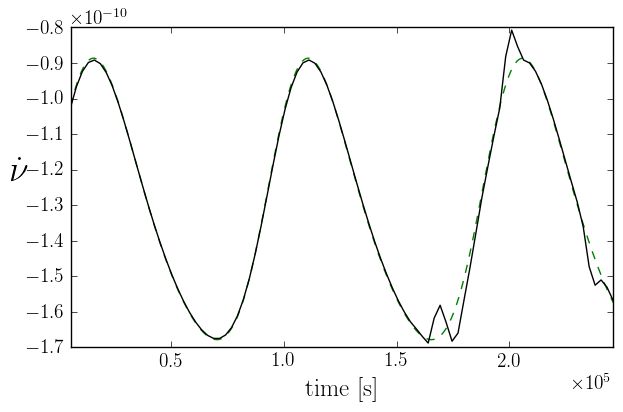

In [20]:
fig, ax = plt.subplots(figsize=(7, 4))

# Parameters
omega0 = 2*np.pi*10
epsI3 = 1.05e-6
epsA = 3e-10
chi0 = 45.0
a0 = 3.0
n = 50000
error = 1e-13

tauP = 1.2 * np.pi/abs(epsI3 * omega0)
T = 4.4 * tauP


time = np.linspace(0, T, 1000)
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax.plot(time, SignalModel_EM2(theta_EM, time), "--", color="g", label="Hybrid")

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)
File_Functions.PrintParameterDictionary(file_name)

ax = Plot.SpindownRate(file_name, ax=ax, analytic="", divisor=9, label="Numerical integration")
PD = File_Functions.Parameter_Dictionary(file_name)

    
plt.show()

BETA FUNCTION IS USED


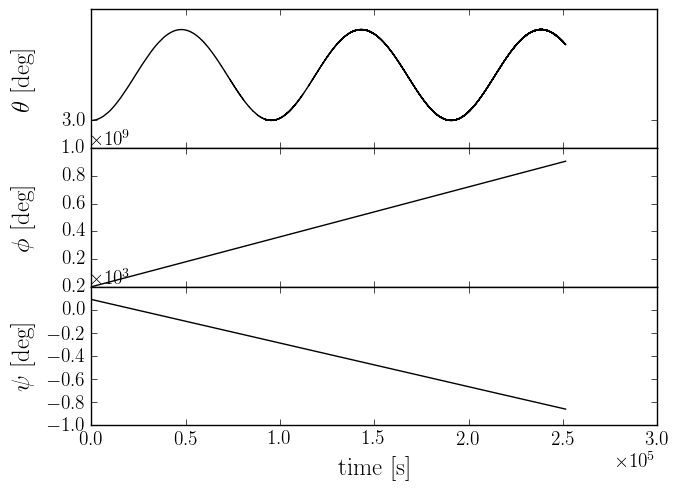

In [ ]:
Plot.Euler_Angles(file_name)
plt.show()

## Compare several parameters

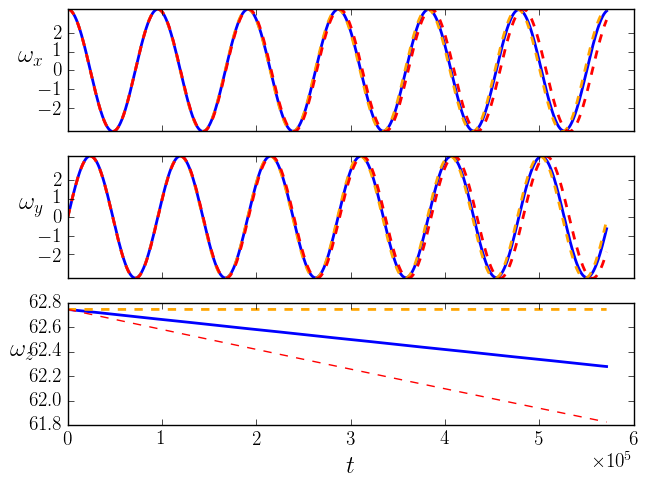

In [21]:

epsA = 3e-7
epsI3 = 1.05e-6
T = 10 * tauP

normal = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)

NoAnom = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=False)

NoTorque = main(chi0=chi0, epsI3=epsI3, epsA=0.0, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)

#axes = Plot.simple_plot(normal, ls="-", lw=2, label="Normal")
axes = Plot.simple_plot(NoAnom, color="b", lw=2, ls="-", label="No anom torque")
axes = Plot.simple_plot(NoTorque, axes=axes, color="orange", ls="--", lw=2, label="No torque")

def wz(t, epsA, omega0, a0):
    R=1e6
    c=3e10
    wz0 = omega0*np.cos(np.radians(a0))
    return 1.0 / np.sqrt(4*R/(3*c) * epsA * t + wz0**-2)

def wx(t, epsI, epsA,  omega0, a0):
    wz_t = wz(t, epsA, omega0, a0)
    return omega0 * np.sin(np.radians(a0)) * np.cos(epsI * wz_t * t)

def wy(t, epsI, epsA,  omega0, a0):
    wz_t = wz(t, epsA, omega0, a0)
    return omega0 * np.sin(np.radians(a0)) * np.sin(epsI * wz_t * t)

time = np.linspace(0, T, 1000)
axes[0].plot(time, wx(time, epsI3, epsA, omega0, a0), "--r", lw=2)
axes[1].plot(time, wy(time, epsI3, epsA, omega0, a0), "--r", lw=2)
axes[2].plot(time, wz(time, epsA, omega0, a0), "--r")

#axes[-1].legend()
plt.show()


In [ ]:
def Psi(t, epsI, epsA, omega0, a0):
    R=1e6
    c=3e10
    pre = -3*epsI *c / (2 * R * epsA) 
    post = np.sqrt(4 * R / (3*c) * epsA*t + (omega0*np.cos(np.radians(a0)))**-2)
    C = np.pi/2 + 3*epsI*c / (2 * R * epsA * omega0 * np.cos(np.radians(a0)))
    return np.degrees(pre * post + C)

def Psi_notorque(t, epsI, omega0):
    return np.degrees(-epsI*omega0*t + np.pi/2.)

#axes = Plot.Euler_Angles(normal, ls="-", lw=1, label="Normal")
axes = Plot.Euler_Angles(NoAnom, color="b", lw=2, ls="-", label="No anom torque")
axes = Plot.Euler_Angles(NoTorque, axes=axes, color="orange", ls="--", lw=2, label="No torque")

axes[2].plot(time, Psi(time, epsI3, epsA, omega0, a0), "-r")
axes[2].plot(time, Psi_notorque(time, epsI3, omega0), "--g", lw=1)

plt.show()

In [ ]:
def simple_plot_diff(file_nameA, file_nameB, axes=None, *args, **kwargs):
    """

    Plots `file_name` in cartesian components

    Parameters
    ----------
    file_name: str
    tmax: float 
    tmin: float
    axes : 3 axes instances,
        If given plot on top of these figures, else new ones are created.

    """
    
    dataA = np.array(File_Functions.One_Component_Import(file_nameA))
    dataB = np.array(File_Functions.One_Component_Import(file_nameB))
    time = dataA[0]
    
    if axes:
        (ax1, ax2, ax3) = axes
    else: 
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True)

    ax1.plot(time, dataA[1] - dataB[1], *args, **kwargs)
    ax1.set_ylabel(r"$\omega_{x}$", rotation="horizontal")
    ax1.set_yticks(ax1.get_yticks()[1:-1])

    ax2.plot(time, dataA[2] - dataB[2], *args, **kwargs)
    ax2.set_ylabel(r"$\omega_{y}$", rotation="horizontal")
    ax2.set_yticks(ax2.get_yticks()[1:-1])

    ax3.plot(time, dataA[3] - dataB[3], *args, **kwargs)
    ax3.set_ylabel(r"$\omega_{z} $", rotation="horizontal")

    ax3.set_xlabel(r"$t$")

    return (ax1, ax2, ax3)

axes = simple_plot_diff(normal, NoTorque, label="Normal")
plt.show()

## Custom comparison

In [ ]:


axes = Plot.simple_plot(normal, ls="-", lw=2, label="Normal")
axes = Plot.simple_plot(NoTorque, axes=axes, color="orange", ls="--", lw=2, label="No torque")

def wx(t, w0, a, epsI, epsA):
    R = 1e6
    c = 3e10
    wz = 1.0 / np.sqrt(2*R/(3*c) * epsA * t + w0**2)
    arg = 69 * w0 * epsI * wz * t
    return w0 * np.sin(np.radians(a)) * np.cos(arg)

time = File_Functions.One_Component_Import(normal)[0]
axes[0].plot(time, wx(time, omega0, a0, epsI3, epsA), ls="-")

axes[-1].legend()
plt.show()

## BREAKING THE METHOD

BETA FUNCTION IS USED


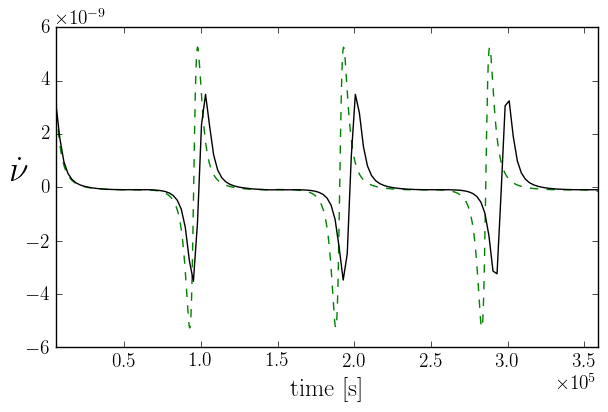

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 3.2863353450e+13
DeltaPhi_49 : 7.1954713695e-01
DeltaPhi_49_SpindownTorque : 6.8832499737e-06
DeltaPhi_63 : 6.3926716921e-02
DeltaPhi_75 : 1.5233980507e-03
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 2.7910847523e-01
P : 1.0005072145e-01
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 1.0000000000e+02
T : 3.6600000000e+05
a0 : 1.5000000000e+01
beta : -5.2624398688e-03
chi0 : 2.0000000000e+01
delta_omega_dot0_FP : 3.1275239495e-09
delta_omega_dot0_FP_EM : 2.7785856953e-10
epsA : 3.0000000000e-10
epsI1 : 0.0000000000e+00
epsI3 : 1.0500000000e-06
n : 5.0000000000e+04
nu_dot0 : -3.0740517412e-11
omega0 : 6.2800000000e+01
omega_dot0 : -1.9314836734e-10
tauA : 3.3350240484e+08
tauE : 3.2513865308e+11
tauP : 9.5286401383e+04
tauS : 3.8033997322e+10
upsilon : 0.0000000000e+00
wobble_angle : 2.6189374000e-01
wobble_angle_spindown : 2.5052981054e-06


In [15]:
fig, ax = plt.subplots(figsize=(7, 4))

# Parameters
omega0 = 2*np.pi*10
epsI3 = 1.05e-6
epsA = 3e-10
chi0 = 20.0
a0 = 15.0
n = 50000
error = 1e-14

tauP = 1.2 * np.pi/abs(epsI3 * omega0)
T = 6.4 * tauP


time = np.linspace(0, T, 1000)
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax.plot(time, SignalModel_EM2(theta_EM, time), "--", color="g", label="Hybrid")

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)

ax = Plot.SpindownRate(file_name, ax=ax, analytic="", divisor=9, label="Numerical integration")


plt.show()

File_Functions.PrintParameterDictionary(file_name)